<a href="https://colab.research.google.com/github/julian-masdatascience/ML/blob/master/Supervisada1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML - Supervisado

Las librerias más utilizadas son scikit-learn, TensorFlow y keras

### Lets Go!!

In [19]:
## Se importan las librerias
from sklearn import datasets 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
## cargamos un dataset de la libreria sklearn
ds = datasets.load_iris()

In [11]:
type(ds)

sklearn.utils.Bunch

In [12]:
ds.data.shape

(150, 4)

In [13]:
ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Ahora comienza la gestión de los datos que necesitamos para generar una ML - Supervisada

In [17]:
X = ds.data  
y = ds.target
df = pd.DataFrame(X, columns=ds.feature_names) 
print(df.sample(10))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
146                6.3               2.5                5.0               1.9
137                6.4               3.1                5.5               1.8
81                 5.5               2.4                3.7               1.0
78                 6.0               2.9                4.5               1.5
63                 6.1               2.9                4.7               1.4
117                7.7               3.8                6.7               2.2
10                 5.4               3.7                1.5               0.2
140                6.7               3.1                5.6               2.4
101                5.8               2.7                5.1               1.9
44                 5.1               3.8                1.9               0.4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fba777e48>,
      dtype=object)

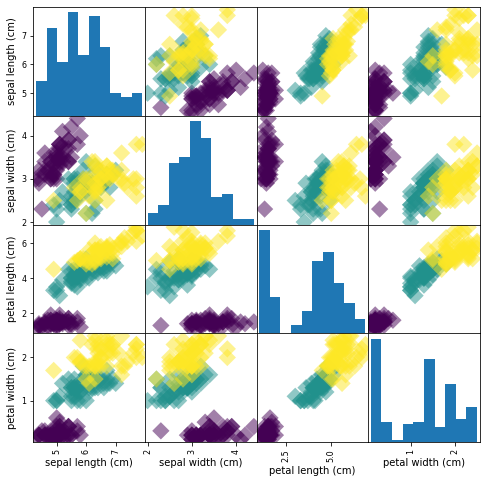

In [18]:
pd.plotting.scatter_matrix(df, c = y, figsize = [8, 8],s=150, marker = 'D')

## K-NN: Intuición

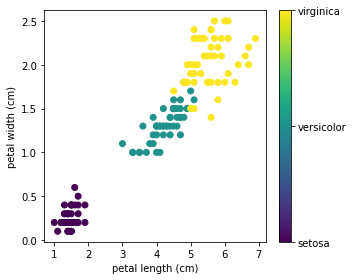

In [56]:
iris = datasets.load_iris()


# The indices of the features that we are plotting
x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

### Usemos las funciones 

#### Fit / Predict

In [57]:
from sklearn.neighbors import KNeighborsClassifier  
# se crea el modelo 
knn = KNeighborsClassifier(n_neighbors=6) 
# se ajusta el modelo a los datos 
knn.fit(iris['data'], iris['target'])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [58]:
# datos
iris.data.shape

(150, 4)

In [59]:
# objetivo
iris.target.shape

(150,)

In [73]:
# se definen nuevos valores 
valores =[[5.4, 3.6, 3.4, 1.2]]
predice = knn.predict(valores)
print('Predicción: {}'.format(predice))

Predicción: [1]


#### Train / Set

In [77]:
from sklearn.model_selection import train_test_split  
# se generarán los set de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
print(X_train.shape)
print(y_train.shape)
print("-"*10)
print(X_test.shape)
print(y_test.shape)
print("-"*10)

(105, 4)
(105,)
----------
(45, 4)
(45,)
----------


In [78]:
# se crea el modelo 
knn = KNeighborsClassifier(n_neighbors=8)  
# se ajusta con train
knn.fit(X_train, y_train)
# se comprueba con test
y_pred = knn.predict(X_test)
print("Test set predictions: {}".format(y_pred))

Test set predictions: [1 0 0 0 1 1 0 1 0 0 1 1 2 2 0 2 1 1 0 2 2 1 2 1 0 1 0 0 1 2 0 2 1 0 1 1 1
 2 0 2 2 2 2 1 2]
